In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

url = '2017_RL.csv' # Definimos la ruta al archivo
df = pd.read_csv(url, sep=",") # El comando read lee el archivo .cvs y el separador es una ,
df.head(5)

,fecha,pm25,pm10,ozono,nox
0,2017-01-01 00:00:00,65.0,97.0,2.51998,74.7620
1,2017-01-01 00:00:00,40.0,61.0,1.51306,0.0000
2,2017-01-01 01:00:00,115.0,158.0,2.61847,97.3882
3,2017-01-01 01:00:00,95.0,135.0,1.47069,0.0000
4,2017-01-01 02:00:00,123.0,189.0,2.78399,105.0090


In [7]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (2628, 5)
Nombre columnas: Index(['fecha', 'pm25', 'pm10', 'ozono', 'nox'], dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fecha   2628 non-null   object 
 1   pm25    2628 non-null   float64
 2   pm10    2628 non-null   float64
 3   ozono   2628 non-null   float64
 4   nox     2628 non-null   float64
dtypes: float64(4), object(1)
memory usage: 102.8+ KB


In [9]:
df.describe()

,pm25,pm10,ozono,nox
count,2628.000000,2628.000000,2628.000000,2628.000000
mean,29.676941,56.791476,14.621693,22.333428
std,14.950963,28.164978,16.333034,31.654989
min,0.000000,5.000000,0.000000,0.000000
25%,19.000000,36.000000,3.523613,0.000000
50%,28.000000,51.000000,7.694255,0.000000
75%,37.000000,73.000000,20.058325,38.246100
max,167.000000,221.000000,101.390000,204.353000


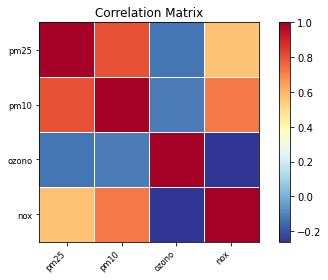

In [10]:
corr = df.set_index('fecha').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [11]:
pm25 = df['pm25'].values
pm10 = df['pm10'].values

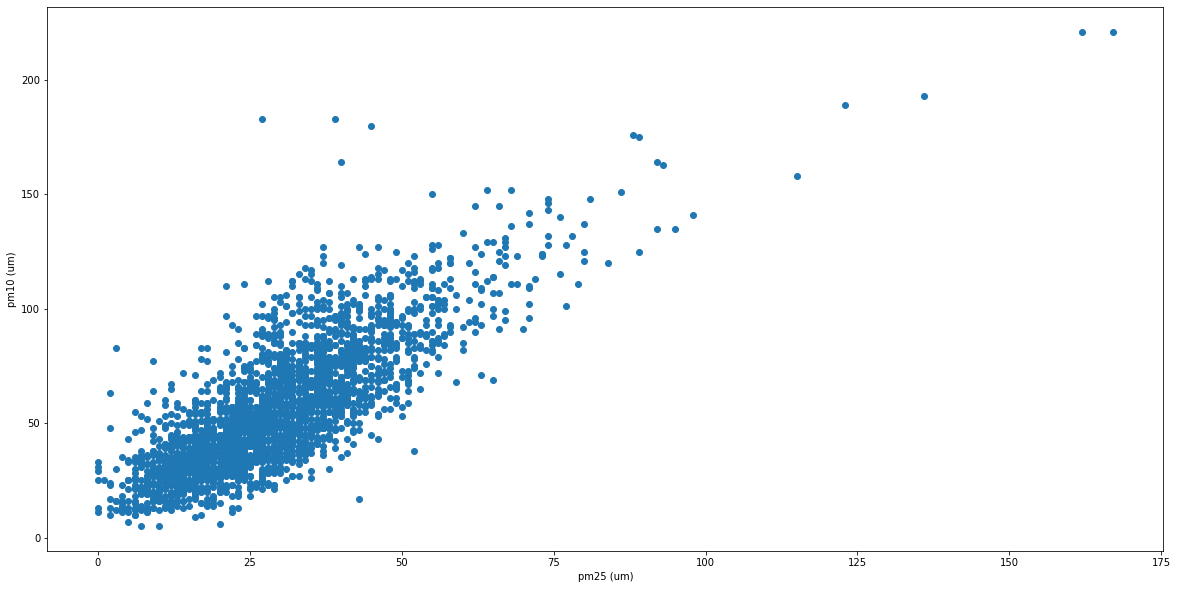

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(pm25,pm10)
plt.xlabel('pm25 (um)')
plt.ylabel('pm10 (um)')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(pm25, pm10, test_size=0.2)

In [14]:
X_train=np.reshape(X_train, (-1,1))
y_train=np.reshape(y_train, (-1,1))
X_test=np.reshape(X_test, (-1,1))
y_test=np.reshape(y_test, (-1,1))

In [16]:
#Se define la función de regresión lineal de la librería sklearn
lr = linear_model.LinearRegression()
#Entreno el modelo
lr.fit(X_train, y_train)
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)

La ecuación del modelo es igual a:
y =  [[1.51881496]] x  [11.73902407]


In [57]:
#Realizo una predicción
Y_pred = lr.predict(X_test)

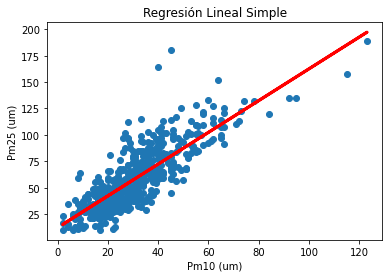

In [58]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Pm10 (um)')
plt.ylabel('Pm25 (um)')
plt.show()


In [59]:
print('Precisión del modelo:')
print(lr.score(X_train, y_train))

Precisión del modelo:
0.6369001216042035
